# Project: Data Investigation Based on Gender Diversity 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> After I became mother I expecienced it firsthand how much your standing in your job and live actually does change. This sad experience let me notice how much biased we are and how poorly our work, government and even leisure is oriented at families and women. Since then, I have been engaged in exploring gender diversity issues, reading articles etc. Once, I read that companies that are more (gender) diversified are also more profitable (provided by the Gender Diversity Index). In this project, my goal is to investigate country data based on diversity issues to find out, how a greater gender diversity correlates with different areas relevant human fields. 

> For this, I have used The Gapminder Data to download the following Data sheets: 
1. Sex ratio (all age groups) as sex_ratio_all_age_groups.csv

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> First of all, I will check the CSVs for missing data, clean up and merge datasets to prepare for my analysis.

### General Properties

In [95]:
df_sex = pd.read_csv ('sex_ratio_all_age_groups.csv')
df_sex.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,112.0,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,98.6,NaN,NaN,NaN,NaN,98.4
1,Albania,105.0,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,NaN,104.0
2,Algeria,103.0,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,NaN,103.0
3,Angola,94.2,NaN,NaN,NaN,NaN,94.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,95.6,NaN,NaN,NaN,NaN,95.5
4,Antigua and Barbuda,97.4,NaN,NaN,NaN,NaN,97.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,97.9,NaN,NaN,NaN,NaN,97.9


> This Dataset describes the sex ratio as male divided by female (by 100) among all age groups per country, which means if ratio is > 100 then male dominates if <100 then female dominates. 
It looks like there ratio is investigated only every five years and there are four years of cells with missing information following an entry. 

In [96]:
df_sex.shape

(184, 152)

> 152 are a lo of columns. To make it less complex, I will drop the NaN cells.

In [97]:
df_sex.dropna(axis=1, inplace=True)
df_sex.shape

(184, 32)

>Now it is less complex. I will check the data for other missing values or duplicates.

In [52]:
df_sex.isnull().sum().any()

False

>Moreover, I noticed that there is data beyond 2020 provided. I will not need it for the moment, so I will drop it and select only the data from 1950 to 2020). 

In [102]:
df_ps = df_sex.iloc[:, :16]
df_ps.head()

,country,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Afghanistan,112.0,109.0,107.0,105.0,104.0,103.0,103.0,104.0,105.0,107.0,106.0,107.0,106.0,106.0,106.0
1,Albania,105.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0,105.0,96.9,102.0,101.0,101.0,102.0,102.0
2,Algeria,103.0,102.0,101.0,101.0,101.0,101.0,102.0,102.0,103.0,103.0,103.0,102.0,102.0,102.0,102.0
3,Angola,94.2,94.4,94.6,94.7,95.0,95.3,95.6,95.6,95.7,95.5,95.6,95.6,95.8,96.1,96.4
4,Antigua and Barbuda,97.4,97.8,89.0,90.6,91.5,92.0,95.3,94.4,93.6,94.6,89.1,92.1,92.0,92.2,92.4


In [103]:
df_ps.shape

(184, 16)

In [105]:
sum(df_ps.duplicated())

0

>The first dataset is ready for data exploration.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Is the world female or male? 
> To answer the first question, I want to find out how the ratio develops over time. First of all, I will have a general view at the statistics of the data.

In [106]:
# this returns useful descriptive statistics for each column of data
df_ps.describe()

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,98.636413,98.689674,98.772826,99.108696,99.324457,99.879891,100.044565,100.062500,100.205435,100.248913,100.063043,100.596196,101.782065,101.902174,102.003261
std,8.936365,8.694396,9.311103,9.138493,9.789528,13.192860,12.731213,11.692338,12.012301,12.230563,12.179210,14.790779,22.882347,22.148404,21.279246
min,74.400000,76.900000,79.000000,82.000000,83.400000,84.200000,84.900000,85.800000,86.900000,85.400000,85.000000,84.700000,84.500000,84.800000,85.100000
25%,94.400000,94.675000,94.700000,94.975000,95.475000,95.850000,95.875000,96.000000,96.075000,96.100000,96.275000,96.075000,96.400000,96.600000,96.675000
50%,98.550000,98.700000,98.700000,98.850000,98.900000,98.900000,98.600000,98.550000,98.400000,98.300000,98.450000,98.450000,98.650000,99.000000,99.050000
75%,103.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
max,148.000000,159.000000,179.000000,160.000000,176.000000,227.000000,229.000000,202.000000,203.000000,198.000000,208.000000,236.000000,314.000000,307.000000,293.000000


> The first thing I notice is that the sex ratio is increasing, I did not expect that! I will make a chart on the mean to get a visualisation of it.

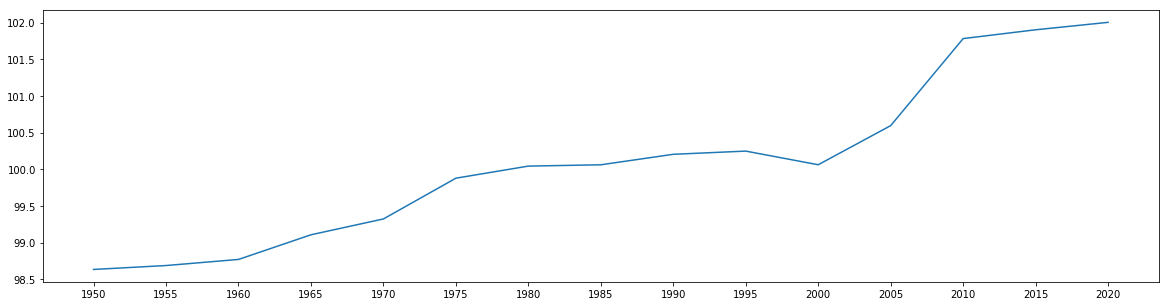

In [107]:
plt.figure(figsize=(20,5))
plt.plot(df_ps.mean())
plt.show()

> I have changed the figure size so that the years are visible. From the descriptive statistics above, we can see that since 1980, the sex ratio index is > 100, meaning that since then, there are more males than females in the world. It looks like the sex ratio is increassing over time, and even further increasing since 2000.  I will try to incestigate, why. 

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])